In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
y = df['Class']
y.value_counts()
y_cat = pd.get_dummies(y)

In [0]:
x = df.drop('Class', axis=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


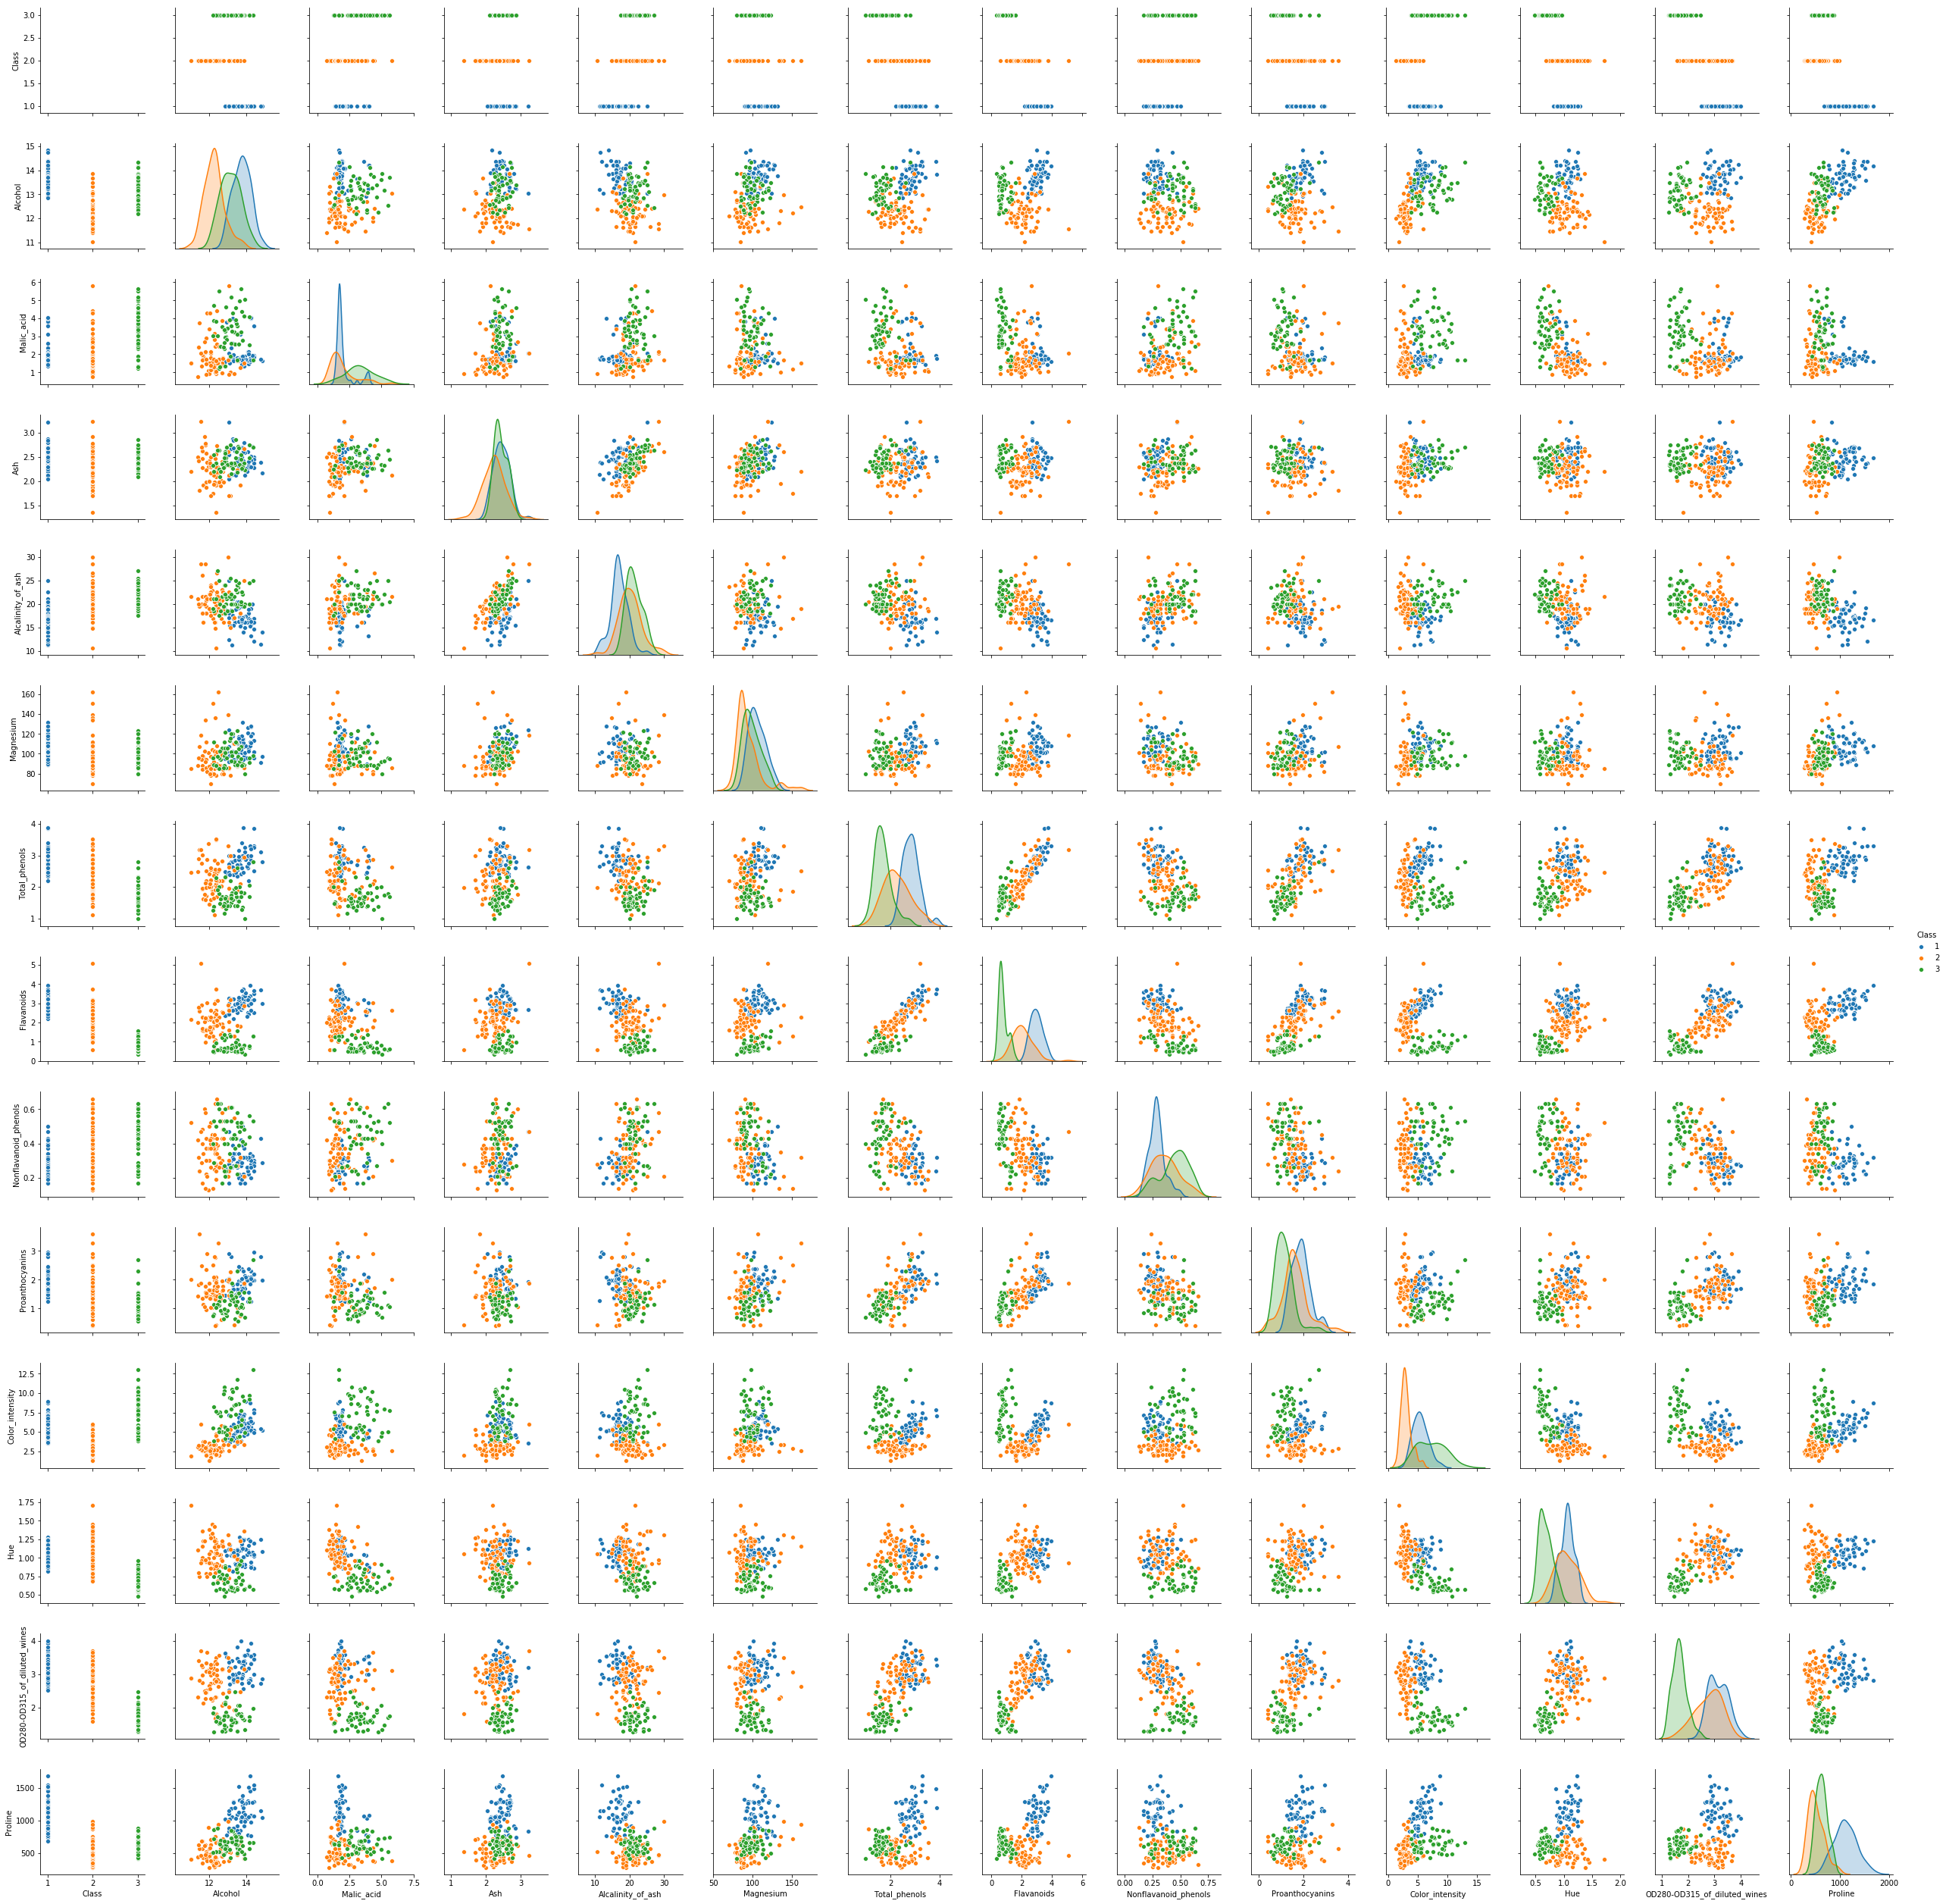

In [6]:
import seaborn as sns
sns.pairplot(df, hue='Class')

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [0]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

<h2>Call Back
<h4> EarlyStopping callback to stop your training if the val_loss doesn't improve
<h4>ModelCheckpoint callback to save the trained model to disk once training is finished
<h4>TensorBoard callback to output your training information to a /tmp/ subdirectory

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/Weights/weights.hdf5",
                               verbose=1, save_best_only=True)

In [0]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto') 

In [0]:
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/Weights/tensorboard/')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

<h2>Keras Model

In [19]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_last)

In [36]:
model = Model(inputs=inputs, outputs=outputs)
model.compile(RMSprop(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=2, validation_data=(x_test, y_test),
              callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
 - 0s - loss: 0.1055 - acc: 0.9677 - val_loss: 0.1057 - val_acc: 0.9815

Epoch 00001: val_loss did not improve from 0.08602
Epoch 2/20
 - 0s - loss: 0.0545 - acc: 0.9919 - val_loss: 0.1357 - val_acc: 0.9630

Epoch 00002: val_loss did not improve from 0.08602
Epoch 00002: early stopping


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.201224). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104788). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


<h2>Extract feature from dense_3

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [0]:
features_function = K.function([inputs], [second_last])

In [0]:
features = features_function([x_sc])[0]

In [25]:
features.shape

(178, 2)

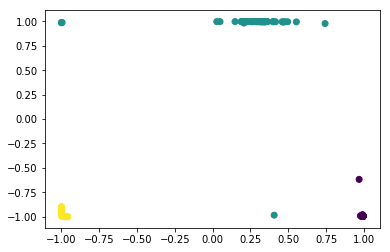

In [26]:
plt.scatter(features[:, 0], features[:, 1], c=y)

In [34]:
load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
